# **Analyse de sentiments sur les films du TOP 100 box office (Notebook principal)**
**Projet Python - 2A ENSAE**

AUMONT Louis-Armand, KHAIRALDIN Ahmed, GIMENES Vincent

## Introduction

L'objectif de ce Notebook va être de: 
+ **1)** Charger la base de données, puis nettoyer les commentaires pour les "tokenisés" et enfin les "lemmatisés"
+ **2)** Appliquer des algorithmes de NLP sur nos commentaires "lemmatisés" afin de déduire pour chaque commentaire un score de polarité
+ **3)** Procéder à une analyse de statistique descriptive avec nos variables et visualiser des relations entre elles
+ **4)** Modéliser pour tenter d'analyser les relations entre nos variables (linéaires, quadratiques), si pas de relation apparente, tester statistiquement la non-corrélation


### Traitement des données et analyse de sentiments

Avant de pouvoir faire de l'analyse de sentiment pour chaque commentaire, il faut d'abord les nettoyer pour les rendre lisibles pour l'ordinateur. Premièrement, nous allons transformer le fichier data_reviews en une base de données où chaque observation est un commentaire. Puis, nous allons nettoyer chaque commentaire en utilisant des fonctions permettant de supprimer la ponctuation, les stop-words et la lemmatisation.



####  Download Library ⚙️

In [3]:
!pip install spacy
!pip install wordcloud
!pip install textblob

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.9/45.9 kB 556.7 kB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.2/65.2 kB 7.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 181.6/181.6 kB 20.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 15.7 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.1/46.1 kB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 156.9/156.9 kB 13.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 381.9/381.9 kB 9.4 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 15.2 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 493.0/493.0 kB 17.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 920.6/920.6 kB 15.5 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.1/50.1 kB 8.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.2/10.2 MB 15.2 MB/s eta 0:00:0000:0

####  Import Library 📦

In [4]:
# Importation de packages nécessaires

import pandas as pd
import json
import nltk
import spacy
import matplotlib.pyplot as plt
import seaborn as sns 

# Style
sns.set_style('darkgrid')

from nltk.sentiment import SentimentIntensityAnalyzer
from textblob import TextBlob
from wordcloud import WordCloud
from nltk.stem import WordNetLemmatizer

In [5]:
# Téléchargement d'éléments nécessaires à la tokenisation
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

# Download the VADER lexicon for sentiment analysis
nltk.download('vader_lexicon')

[nltk_data] Downloading package punkt to /home/onyxia/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /home/onyxia/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /home/onyxia/nltk_data...
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /home/onyxia/nltk_data...


True

## **1.** Création de la base de données des commentaires

### **1.1** Création du DataFrame

In [6]:
# Transformation du fichier json en un Dataframe Pandas

# Charger le fichier JSON
with open("data_reviews.json", 'r') as file:
    data = json.load(file)

In [7]:
movie_name = []
comments = []
notes = []
year= []
budget=[]
recette=[]
duree=[]

for movie, dico in data.items():
    if '0' in dico and isinstance(dico['0'], list):  # Vérifier si la clé '0' est une liste
        for comment in dico['0']:
            movie_name.append(movie)
            comments.append(comment)
            year.append(dico['1'])
            notes.append(dico['2'])
            budget.append(dico['3'])
            recette.append(dico['4'])
            duree.append(dico['5'])

df = pd.DataFrame({
    'Film': movie_name,
    'Commentaire': comments,
    'Annee':year,
    'Note imdb': notes,
    'Budget':budget,
    'Box office':recette,
    'duree':duree
})

df.sample(5)

,Film,Commentaire,Annee,Note imdb,Budget,Box office,duree
1700,Avengers (2012),"The Avengers, a superhero symphony that had me...",2012,"8,0",220000000,1520538536,2h 23m
15856,Thor: Ragnarok (2017),If you're expecting an exciting Marvel adventu...,2017,"7,9",180000000,855301806,2h 10m
4702,Les Minions (2015),"Well, needless to say, I love minions! From th...",2015,"6,4",74000000,1159444662,1h 31m
8814,Zootopie (2016),It has been interpreted as a metaphorical film...,2016,"8,0",150000000,1025521689,1h 48m
6203,Jurassic Park (1993),It's indeed rare when a movie comes along that...,1993,"8,2",63000000,1113138548,2h 7m


### **1.2** Nettoyage des commentaires

#### **1.2.1** Tokenisation et suppression de la ponctuation

Il faut executer la cellule ci-dessous pour pouvoir charger le modèle de la langue anglaise de scapy.

In [8]:
# permet d'afficher un commentaire même si il est très long
pd.set_option('display.max_colwidth', None)

In [9]:
#oOn retire les "\n" dans les commentaires
df["Commentaire"] = df["Commentaire"].str.replace('\n','')
df["Commentaire"].sample()

3913    I don't know about you guys, but I was left thinking "What was the bloody point?" and came out feeling underwhelmed as everything felt weaker compared to the 1991 original. Emma Watson is not very good as Belle, and they didn't change it enough to make it stand out like The Jungle Book or Pete's Dragon remake. Disney felt really lazy here, sadly. I hope we see more effort in the future rather than just 90% the exact same movie.4.5/10
Name: Commentaire, dtype: object

In [10]:
pd.set_option('display.max_colwidth', 100)

In [11]:
!python3 -m spacy download en_core_web_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 13.5 MB/s eta 0:00:0000:0100:01
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [12]:
# On commence par charger le modèle de la langue anglaise de Spacy (les commentaires sont en anglais)
nlp = spacy.load('en_core_web_sm')

# Fonction qui prend en argument un commentaire (chaîne de caractère) et qui retourne une liste des tokens sans les stopwords et la ponctuation
def tokenize(text):
    doc = nlp(text)
    tokens = [token.text for token in doc if not token.is_stop and not token.is_punct]
    return tokens

In [13]:
%%time
# On crée une nouvelle colonne avec la liste des tokens pour chaque commentaire
df['Tokens'] = df['Commentaire'].apply(tokenize)
df.sample(5)

CPU times: user 9min 37s, sys: 1.23 s, total: 9min 38s
Wall time: 9min 38s


,Film,Commentaire,Annee,Note imdb,Budget,Box office,duree,Tokens
11216,Le Hobbit: La Désolation de Smaug (2013),"When I saw The Hobbitt, I thought it was one book and one additional movie. I was surprised when...",2013,"7,8",225000000,959027992,2h 41m,"[saw, Hobbitt, thought, book, additional, movie, surprised, movie, ended, split, movies, Smaug, ..."
14211,Spider-Man: Homecoming (2017),"Spider-Man, at his core, is the original kid superhero. His innocence and naivete are as importa...",2017,"7,4",175000000,880166924,2h 13m,"[Spider, Man, core, original, kid, superhero, innocence, naivete, important, intellect, wit, pre..."
17354,Les Animaux fantastiques (2016),"Filming is beautifully done, acting superb, humor everywhere. Fantastic imagination and script b...",2016,"7,2",180000000,816037575,2h 12m,"[Filming, beautifully, acting, superb, humor, Fantastic, imagination, script, JK, Rowling, cours..."
1712,Avengers (2012),"This, friends, is the comic book movie that all other comic book movies wish they could be. It's...",2012,"8,0",220000000,1520538536,2h 23m,"[friends, comic, book, movie, comic, book, movies, wish, pinnacle, ultimate, surely, unsurpassab..."
3476,Star Wars : Épisode VIII - Les Derniers Jedi (2017),"I really enjoyed this movie, despite its many flaws. Anything under 5 stars is just neckbeard ed...",2017,"6,9",317000000,1334407706,2h 32m,"[enjoyed, movie, despite, flaws, 5, stars, neckbeard, edgelords, trying, cool, Aside, prank, pho..."


Avec Spacy, l'algortihme s'exécute en près de 11 min pour l'ensemble de la base de données. Nous avons utilisé Spacy et non nltk pour la tokenization et la suppression des stopwords, puisque Spacy a un répertoire plus important de stopwords et a de meilleures performances pour les textes volumineux.

#### **1.2.2** Lemmatisation des commentaires   
Nous allons désormais procéder à la lemmatisation des commentaires pour pouvoir allèger les algorithmes de NLP plus tard.

In [14]:
# Fonction qui prend en argument une liste de tokens et qui retourne ces tokens lemmatisés
def lemm(tokens):
    # D'abord, on transforme la liste en doc Spacy
    tokens_as_doc = spacy.tokens.Doc(nlp.vocab, words=tokens)
    # Lemmatisation du doc 
    lemmatized = [token.lemma_ for token in tokens_as_doc]
    return lemmatized
# Le lemma_ de Spacy ne reconnait pas les tokens et renvoie des listes vides (Pourquoi ?)

lemmatizer = WordNetLemmatizer()

def lemm2(tokens):
    lemmatized = [lemmatizer.lemmatize(token) for token in tokens]
    return lemmatized



In [15]:
# On crée une nouvelle colonne des tokens lemmatisés
df['Tokens lemmatisés'] = df['Tokens'].apply(lemm2)
df.sample(5)

,Film,Commentaire,Annee,Note imdb,Budget,Box office,duree,Tokens,Tokens lemmatisés
1388,Jurassic World (2015),I am sick and tired of people who readily tear apart movies as if this is some kind of high art ...,2015,"6,9",150000000,1671537444,2h 4m,"[sick, tired, people, readily, tear, apart, movies, kind, high, art, requires, close, study, rea...","[sick, tired, people, readily, tear, apart, movie, kind, high, art, requires, close, study, read..."
167,Avatar (2009),We have only one complaint about this movie. Many good reviews have already been written here......,2009,"7,9",237000000,2923706026,2h 42m,"[complaint, movie, good, reviews, written, spoilers, shame, experience, spoiled, ones, imaginati...","[complaint, movie, good, review, written, spoiler, shame, experience, spoiled, one, imagination,..."
6673,Joker (2019),"This movie is a masterpiece! It absolutely epitomizes what a DC movie should be. Dark, emotional...",2019,"8,4",55000000,1078958282,2h 2m,"[movie, masterpiece, absolutely, epitomizes, DC, movie, Dark, emotional, thought, provoking, act...","[movie, masterpiece, absolutely, epitomizes, DC, movie, Dark, emotional, thought, provoking, act..."
12272,Harry Potter et l'Ordre du Phénix (2007),Television director David Yates makes his first foray into cinema with the latest Harry Potter e...,2007,"7,5",150000000,939288806,2h 18m,"[Television, director, David, Yates, makes, foray, cinema, latest, Harry, Potter, entry, decided...","[Television, director, David, Yates, make, foray, cinema, latest, Harry, Potter, entry, decidedl..."
5621,Spider-Man: Far from Home (2019),"That is what I've come to expect from 90% of the Marvel movies. Some are Bad, and very few lean ...",2019,"7,4",160000000,1131927996,2h 9m,"[come, expect, 90, Marvel, movies, Bad, lean, Great, childish, movie, feel, story, perfectly, fi...","[come, expect, 90, Marvel, movie, Bad, lean, Great, childish, movie, feel, story, perfectly, fin..."


### **1.3** Représentation des mots

Maintenant, visualisons pour certains commentaires les mots les plus représentés après nettoyage des commentaires.

Commençons d'abord par visualiser un premier nuage de mots d'un commentaire quelconque.

In [16]:
# Fonction qui prend en argument une liste de tokens et qui retourne le nuage de mots correspondant.

def cloud(tokens):
    text = " ".join(tokens)
    wordcloud = WordCloud(width=800, height=400, background_color="white").generate(text)
    return wordcloud

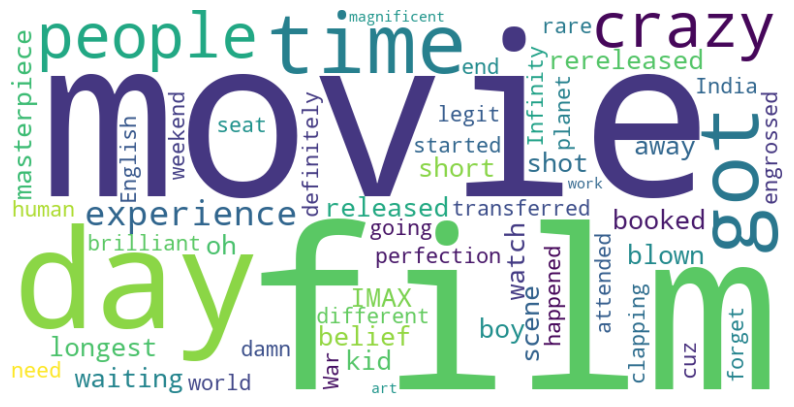

In [17]:
plt.figure(figsize=(10, 8))
plt.imshow(cloud(df['Tokens lemmatisés'][0]), interpolation='bilinear')
plt.axis("off")
plt.show()

Par exemple, pour le premier commentaire de la bdd, on peut dès à présent avoir une idée sur son avis vis à vis du film grâce à ce nuage de mots, de par la présence de mots tels que 'masterpiece, 'magnificent', 'perfection'... qui sont assez représentés. Néanmoins, comme nous avons utilisé nltk, le lemmatiseur ne reconnait pas les entités nommés telles que 'IMAX', 'India'... .

## **2.** NLP et analyse de sentiments

In [18]:
#Convertir les commentaires en string.
def string_function(column):
    return column.str.lower()

df['Commentaire'] =  string_function(df["Commentaire"])

Nous allons comparer les différents algorithmes proposés, notamment ceux des modules TextBlob, nltk et scapy.

On va dans un premier temps utiliser le module TextBlob

In [19]:
def analyze_sentiment_blob(tokens):
    text = ' '.join(tokens)
    blob = TextBlob(text)
    return blob.sentiment.polarity

In [20]:
# Appliquez la fonction à la colonne 'tokens_lemmatized' du DataFrame
df['sentiment_polarity_blob'] = df['Tokens lemmatisés'].apply(analyze_sentiment_blob)

On essaye maintenant avec la fonction SentimentIntensityAnalyzer de nltk

In [21]:
def analyze_sentiment_nltk(tokens):
    text = ' '.join(tokens)
    sia = SentimentIntensityAnalyzer()
    return sia.polarity_scores(text)['compound']

In [22]:
%%time
df['sentiment_polarity_nltk'] = df["Tokens lemmatisés"].apply(analyze_sentiment_nltk)

CPU times: user 1min 41s, sys: 64.9 ms, total: 1min 41s
Wall time: 1min 41s


On essaye enfin de faire de l'analyse de sentiment avec le module scapy.

La fonction ci-dessus ne fonctionne pas bien puisqu'elle retourne que des 0. Je la laisse au cas où on trouve le problème.

Les notes et les années sont sous forme de string. Nous changeons cela pour pourvoir faire des statistiques avec.

In [23]:
df.dtypes

Film                        object
Commentaire                 object
Annee                       object
Note imdb                   object
Budget                      object
Box office                  object
duree                       object
Tokens                      object
Tokens lemmatisés           object
sentiment_polarity_blob    float64
sentiment_polarity_nltk    float64
dtype: object

In [24]:
#change le type de la colonne 'Note imdb' en float
df['Note imdb'] = df['Note imdb'].str.replace(',', '.').astype(float)
df['Annee'] = df['Annee'].astype(float)
df["Budget"] = df["Budget"].astype(float)
df['Box office'] = df["Box office"].astype(float)

On groupe les observations selon le film.

In [25]:
grouped = df.groupby('Film')
df_grouped = grouped[["sentiment_polarity_nltk", "sentiment_polarity_blob",  'Note imdb', 'Annee', "Budget", "Box office"]].mean()

Il peut être interessant de regarder aussi la variance des scores

In [26]:
var_by_group = grouped[["sentiment_polarity_nltk", "sentiment_polarity_blob"]].var()

In [29]:
correlation = df_grouped['sentiment_polarity_nltk'].corr(df_grouped['Note imdb'])
print(f"La correlation entre les notes sur imbd et la moyenne des scores de la polarité des sentiments par film évalué avec la library nltk est de {correlation}")

La correlation entre les notes sur imbd et la moyenne des scores de la polarité des sentiments par film évalué avec la library nltk est de 0.3709966160559881


In [30]:
correlation = df_grouped['sentiment_polarity_blob'].corr(df_grouped['Note imdb'])
print(f"La correlation entre les notes sur imbd et la moyenne des scores de la polarité des sentiments par film évalué avec la library textblob est de {correlation}")

La correlation entre les notes sur imbd et la moyenne des scores de la polarité des sentiments par film évalué avec la library textblob est de 0.4733692708767008


In [31]:
correlation = df_grouped['sentiment_polarity_nltk'].corr(df_grouped['sentiment_polarity_blob'])
print(f"La correlation entre la moyenne des scores de la polarité des sentiments par film évalué avec la library nltk et la moyenne des scores de la polarité des sentiments par film évalué avec la library textblob est de {correlation}")

La correlation entre la moyenne des scores de la polarité des sentiments par film évalué avec la library nltk et la moyenne des scores de la polarité des sentiments par film évalué avec la library textblob est de 0.7417632126035837


Il y a une relation positive non négligeable entre les notes et le score des commentaires. Il y a également une forte corrélation entre les scores évalués par textblob et ceux évalués par nltk.

## **3.** Etude statistique du DataFrame

Nous allons séparer l'étude de notre DataFrame en deux temps:
- En premier lieu, analyse des variables numériques
- En second lieu, analyse statistique des commentaires

### **3.1** Variables numérique   
En premier lieu, on va regarder le type des variables de notre DataFrame afin de différencier les variables catégoriques, continues et textuelles

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17889 entries, 0 to 17888
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Film                     17889 non-null  object 
 1   Commentaire              17889 non-null  object 
 2   Annee                    17889 non-null  float64
 3   Note imdb                17889 non-null  float64
 4   Budget                   17889 non-null  float64
 5   Box office               17889 non-null  float64
 6   duree                    17889 non-null  object 
 7   Tokens                   17889 non-null  object 
 8   Tokens lemmatisés        17889 non-null  object 
 9   sentiment_polarity_blob  17889 non-null  float64
 10  sentiment_polarity_nltk  17889 non-null  float64
dtypes: float64(6), object(5)
memory usage: 1.5+ MB


#### **3.1.1** Les notes

/tmp/ipykernel_315/3206841218.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df_grouped['Note imdb'], palette="RdYlBu_r")


Text(0.5, 1.0, 'Répartition des notes moyennes des films de notre échantillon')

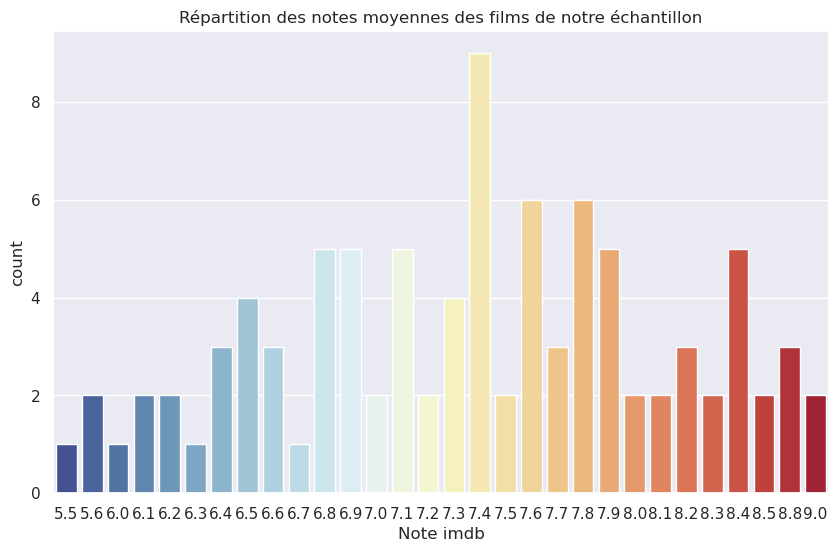

In [47]:
# Répartition de la note moyenne sur notre échantillon de 100 films
plt.figure(1, (10,6))
sns.countplot(x=df_grouped['Note imdb'], palette="RdYlBu_r")
plt.title('Répartition des notes moyennes des films de notre échantillon')

Les notes de notre échantillons semblent bien réparties en dans l'intervalle [5.5, 9.0], avec une forte concentration autour de 7.4, qui est la moyenne des notes de notre échantillon. 
La note minimale pour un film du top 100 sur IMDB est 5.5. La perfection ne semble pas atteignable aux yeux des spectateurs car la note maximale attribuée est de 9.0.

Nous allons maintenant nous intéresser à la distribution de ces notes.

/tmp/ipykernel_315/188193729.py:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(x=df_grouped['Note imdb'],kde=True, bins=30, palette="RdYlBu_r")


Text(0.5, 1.0, 'Distribution des notes moyennes des films de notre échantillon')

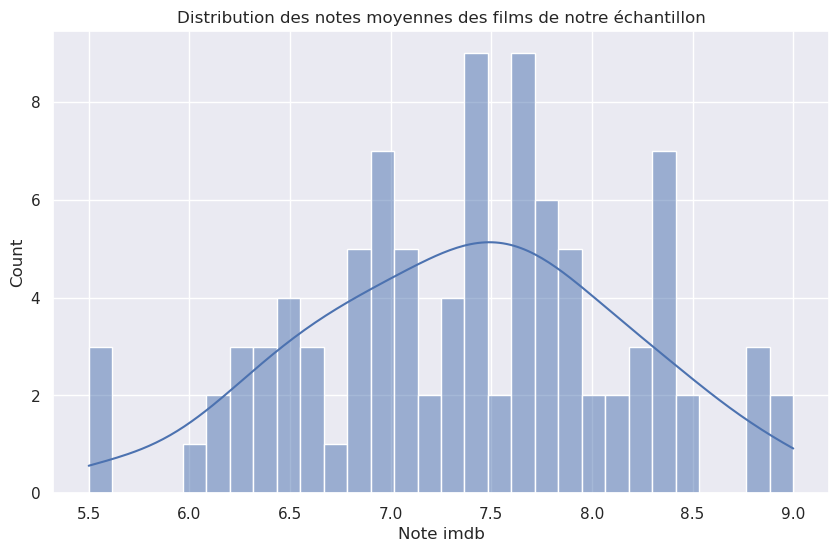

In [48]:
plt.figure(1, (10,6))
sns.histplot(x=df_grouped['Note imdb'],kde=True, bins=30, palette="RdYlBu_r")
plt.title('Distribution des notes moyennes des films de notre échantillon')

**test de noramlité? Jarque berra**

#### **3.1.2** Budget et Box-Office

In [46]:
df_grouped.head()

,sentiment_polarity_nltk,sentiment_polarity_blob,Note imdb,Annee,Budget,Box office
Film,,,,,,
007 Spectre (2015),0.545586,0.130661,6.8,2015.0,245000000.0,8.807053e+08
Aladdin (2019),0.624164,0.175002,6.9,2019.0,183000000.0,1.054304e+09
Alice au pays des merveilles (2010),0.723677,0.137034,6.4,2010.0,200000000.0,1.025468e+09
Aquaman (2018),0.276618,0.006167,6.8,2018.0,160000000.0,1.157347e+09
Avatar (2009),0.844516,0.213078,7.9,2009.0,237000000.0,2.923706e+09


In [49]:
# Création des variables budget et box_office
budget = df_grouped['Budget']
box_office = df_grouped['Box office']

**Statistiques du budget**

In [75]:
min_budget = df_grouped.index[df_grouped['Budget'] == df_grouped['Budget'].min()][0]
max_budget = df_grouped.index[df_grouped['Budget'] == df_grouped['Budget'].max()][0]

In [76]:
print('=== *Statistique Budget* ===')
print(f'Le budget moyen des 100 meilleurs films sur IMDB est de {round(budget.mean()/10**6)} millions de $')
print(f'Le film du top 100 au plus faible budget est {min_budget} et a un budget de {round(budget.min()/10**6)} millions de $')
print(f'Le film du top 100 au plus haut budget est {max_budget} et a un budget de {round(budget.max()/10**6)} millions de $')

=== *Statistique Budget* ===
Le budget moyen des 100 meilleurs films sur IMDB est de 175 millions de $
Le film du top 100 au plus faible budget est Le Roi Lion (1994) et a un budget de 45 millions de $
Le film du top 100 au plus haut budget est Avengers: Endgame (2019) et a un budget de 356 millions de $


**Statistique du Box-Office**

In [78]:
min_bo = df_grouped.index[df_grouped['Box office'] == df_grouped['Box office'].min()][0]
max_bo = df_grouped.index[df_grouped['Box office'] == df_grouped['Box office'].max()][0]

In [ ]:
print('=== *Statistique Box ofice* ===')
print(f'Le revenu moyen des 100 meilleurs films sur IMDB est de {round(box_office.mean()/10**6)} millions de $')
print(f'Le film du top 100 au plus faible revenu est {min_bo} et a un revenu de {round(box_office.min()/10**6)} millions de $')
print(f'Le film du top 100 au plus haut revenu est {max_bo} et a un revenu de {round(box_office.max()/10**6)} millions de $')

=== *Statistique Box ofice* ===
Le revenu moyen des 100 meilleurs films sur IMDB est de 1151 millions de $
Le film du top 100 au plus faible revenu est Shrek le troisième (2007) et a un revenu de 813 millions de $
Le film du top 100 au plus haut revenu est Avatar (2009) et a un revenu de 2924 millions de $


<Axes: xlabel='Box office'>

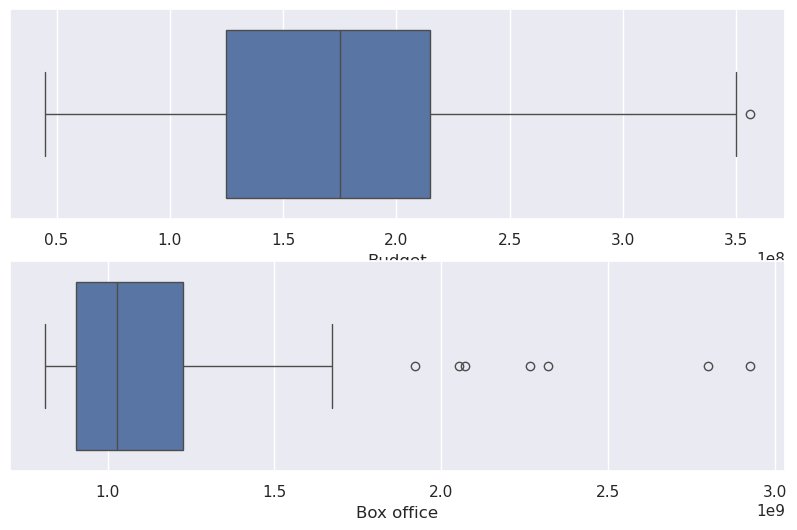

In [52]:
plt.figure(1, (10,6))

#1er boxplot
plt.subplot(2,1,1)
sns.boxplot(x=budget)

#2eme boxplot
plt.subplot(2,1,2)
sns.boxplot(x=box_office)

regression théorique du BO sur le budget

In [37]:
Y.shape

NameError: name 'Y' is not defined

In [38]:
import statsmodels.api as sm 
X = budget
Y = box_office
#X = sm.add_constant(X)
model = sm.OLS(X,Y)
results = model.fit()
results.params


ValueError: endog and exog matrices are different sizes

# Un peu de Visualisation

In [39]:
import seaborn as sns
sns.set_theme(style="darkgrid", palette="deep", color_codes=True)

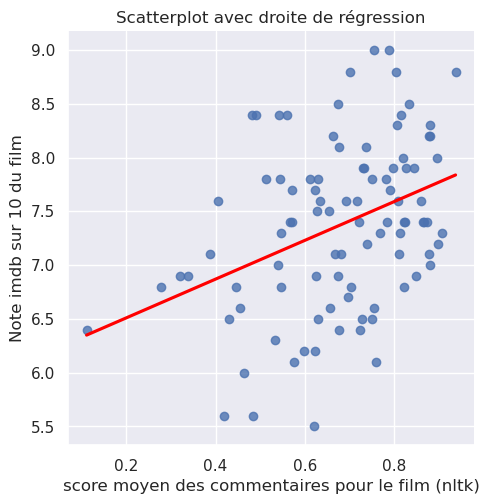

In [42]:
# Affichez le nuage de points
sns.lmplot(x='sentiment_polarity_nltk', y='Note imdb', data=df_grouped, line_kws={'color': 'red'}, ci=None)

# Ajout de titres et de labels
plt.title('Scatterplot avec droite de régression')
plt.xlabel('score moyen des commentaires pour le film (nltk)')
plt.ylabel('Note imdb sur 10 du film')

# Affichage du graphique
plt.show()

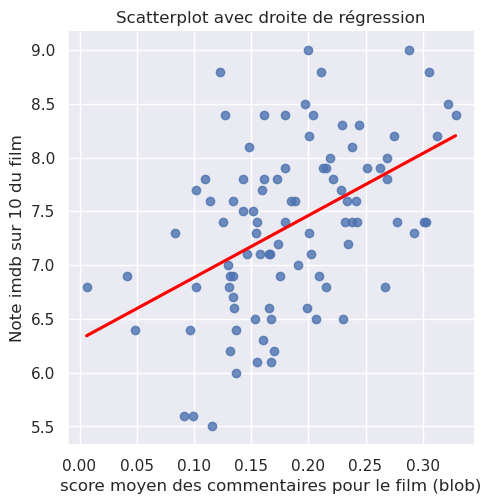

In [43]:
# Affichez le nuage de points
sns.lmplot(x='sentiment_polarity_blob', y='Note imdb', data=df_grouped, line_kws={'color': 'red'}, ci=None)

# Ajout de titres et de labels
plt.title('Scatterplot avec droite de régression')
plt.xlabel('score moyen des commentaires pour le film (blob)')
plt.ylabel('Note imdb sur 10 du film')

# Affichage du graphique
plt.show()

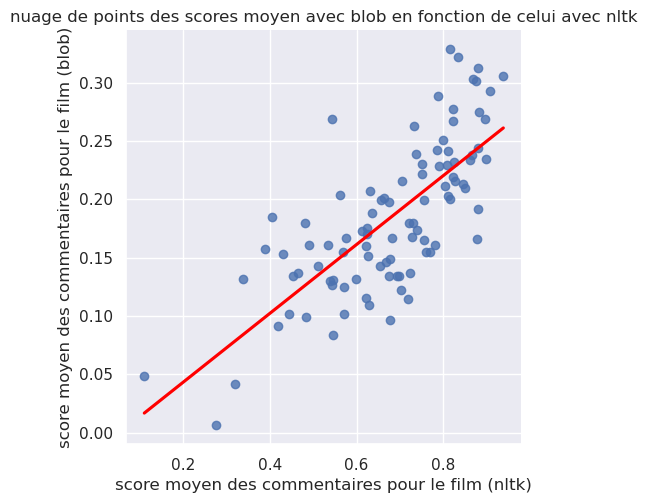

In [44]:
# Affichez le nuage de points
sns.lmplot(x='sentiment_polarity_nltk', y='sentiment_polarity_blob', data=df_grouped, line_kws={'color': 'red'}, ci=None)

# Ajout de titres et de labels
plt.title('nuage de points des scores moyen avec blob en fonction de celui avec nltk')
plt.xlabel('score moyen des commentaires pour le film (nltk)')
plt.ylabel('score moyen des commentaires pour le film (blob)')

# Affichage du graphique
plt.show()